# EDA

In [1]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

**Objective: 병원 재무 데이터를 바탕으로 병원의 개/폐업 예측**

In [3]:
sample = pd.read_csv("C:/Users/kimch/Desktop/9565_hospital_data/submission_sample.csv")
sample.head()

,inst_id,OC
0,2,0
1,5,0
2,6,0
3,8,0
4,10,0


**칼럼**   
inst_id : 각 파일에서의 병원 고유 번호  
OC : 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함(train.csv에만 존재)  
sido : 병원의 광역 지역 정보  
sgg : 병원의 시군구 자료  
openDate : 병원 설립일  
bedCount : 병원이 갖추고 있는 병상의 수  
instkind : 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류  
-종합병원 : 입원환자 100명 이상 수용 가능     
-병원 : 입원 환자 30명 이상 100명 미만 수용 가능  
-의원 : 입원 환자 30명 이하 수용 가능  
-한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관  
ownerChange : 대표자의 변동 여부  
---아래부터 변수는 1: 2017 자료, 2: 2016자료 (* 붙어있는 것은 1이랑 2랑 변수명 미묘하게 다른 것- profit: 1-P, 2-p / dept: 1-d, 2-D)---    
revenue : 매출액  
salescost : 매출원가         
sga : 판매비와 관리비      
salary : 급여     
noi : 영업외수익    
noe : 영업외비용        
Interst : 이자비용       
ctax : 법인세비용   
Profit : 당기순이익     
liquidAsset : 유동자산    
quickAsset : 당좌자산     
receivableS : 미수금(단기)      
inventoryAsset : 재고자산      
nonCAsset : 비유동자산     
tanAsset : 유형자산   
OnonCAsset : 기타 비유동자산     
receivableL : 장기미수금     
debt : 부채총계  
liqiodLiabilities : 유동부채      
shortLoan : 단기차입금     
NCLiabilities : 비유동부채     
longLoan : 장기차입금      
surplus : 이익잉여금    
employee : 고용한 총 직원의 수   

In [3]:
train = pd.read_csv("C:/Users/kimch/Desktop/9565_hospital_data/train.csv")
train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [4]:
train.dtypes

inst_id                 int64
OC                     object
sido                   object
sgg                     int64
openDate                int64
bedCount              float64
instkind               object
revenue1              float64
salescost1            float64
sga1                  float64
salary1               float64
noi1                  float64
noe1                  float64
interest1             float64
ctax1                 float64
profit1               float64
liquidAsset1          float64
quickAsset1           float64
receivableS1          float64
inventoryAsset1       float64
nonCAsset1            float64
tanAsset1             float64
OnonCAsset1           float64
receivableL1          float64
debt1                 float64
liquidLiabilities1    float64
shortLoan1            float64
NCLiabilities1        float64
longLoan1             float64
netAsset1             float64
surplus1              float64
revenue2              float64
salescost2            float64
sga2      

**범주형 변수: sido, instkind, ownerChange**  
**수치형 변수: 그 외** 

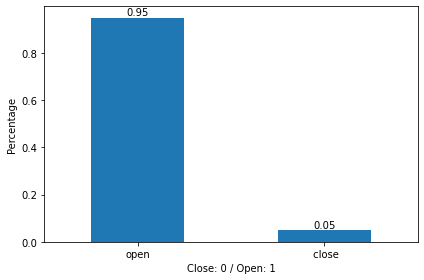

In [5]:
OC = train["OC"].value_counts()/len(train)

ax = OC.plot(kind="bar", figsize=(6,4))

ax.bar_label(ax.containers[0], fmt="%.2f")
ax.set_xlabel("Close: 0 / Open: 1")
ax.set_ylabel("Percentage")

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 범주형 변수 

In [6]:
# categorical로 타입 변경
categorical = ["sido", "instkind", "ownerChange"]
train[categorical] = train[categorical].astype("category")

In [7]:
# pivot_table()
sido = train[["sido", "OC"]]
sido_pivot = pd.pivot_table(sido, index="sido", columns="OC", aggfunc=len, margins=True)
sido_pivot

OC,close,open,All
sido,,,
busan,1.0,25.0,26
choongbuk,NaN,13.0,13
choongnam,1.0,22.0,23
daegu,NaN,14.0,14
daejeon,NaN,13.0,13
gangwon,NaN,10.0,10
gwangju,NaN,2.0,2
gyeongbuk,2.0,37.0,39
gyeonggi,5.0,44.0,49


In [8]:
instkind = train[["instkind", "OC"]]
instkind_pivot = pd.pivot_table(instkind, index="instkind", columns="OC", aggfunc=len, margins=True)
instkind_pivot

OC,close,open,All
instkind,,,
clinic,1.0,17.0,18
dental_clinic,NaN,1.0,1
general_hospital,1.0,36.0,37
hospital,5.0,83.0,88
nursing_hospital,5.0,139.0,144
traditional_clinic,1.0,3.0,4
traditional_hospital,1.0,7.0,8
All,14.0,286.0,300


In [9]:
ownerChange = train[["ownerChange", "OC"]]
ownerChange_pivot = pd.pivot_table(ownerChange, index="ownerChange", columns='OC', aggfunc=len, margins=True)
ownerChange_pivot

OC,close,open,All
ownerChange,,,
change,6,36,42
same,5,242,247
All,11,278,289


In [10]:
sido_pivot = pd.pivot_table(sido, index="sido", columns="OC", aggfunc=len, margins=False)
instkind_pivot = pd.pivot_table(instkind, index="instkind", columns="OC", aggfunc=len, margins=False)
ownerChange_pivot = pd.pivot_table(ownerChange, index="ownerChange", columns="OC", aggfunc=len, margins=False)

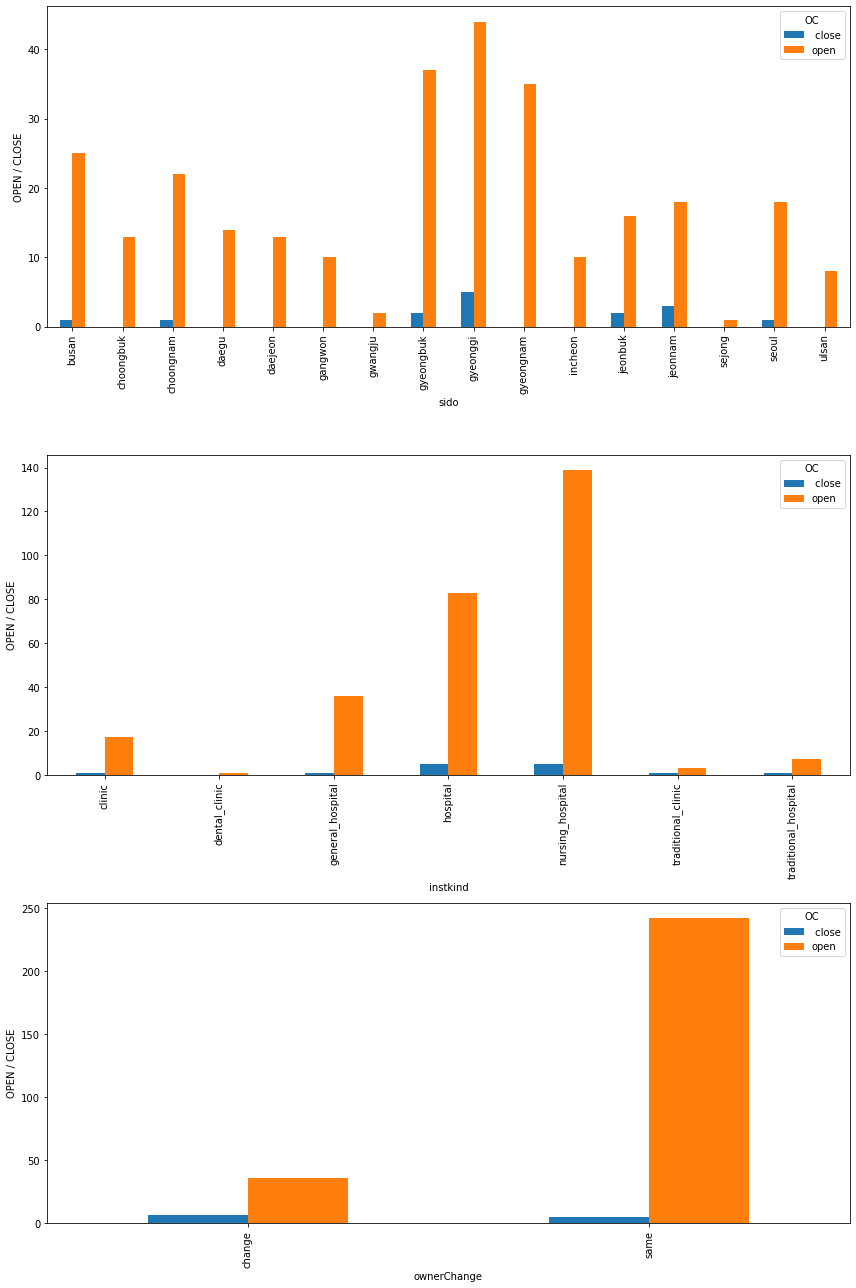

In [11]:
# 그래프 볼 때 주의: 결측치 있음 
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

pivots = [sido_pivot, instkind_pivot, ownerChange_pivot]

for i in range(3):
    ax = pivots[i].plot(kind="bar", ax=axes[i])
    ax.set_ylabel("OPEN / CLOSE")

plt.tight_layout()
plt.show()

## 수치형 변수 

In [106]:
# 주의!! close 앞에 엔터쳐져 있음 ,, 
train[train.OC == " close"]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.0,85.0,74.0,same
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
111,164,close,jeonbuk,136,20050321,326.0,nursing_hospital,2.179021e+09,3.122066e+08,1.507567e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,322.0,320.0,same
141,209,close,busan,63,19991112,151.0,hospital,8.845472e+09,0.000000e+00,7.958490e+09,...,1.495243e+10,1.001811e+10,6.250000e+09,4.934328e+09,4.922328e+09,2.500740e+08,0.0,110.0,110.0,same
158,238,close,jeonnam,19,20150316,119.0,hospital,3.581089e+09,5.106416e+08,2.848303e+09,...,5.376396e+09,2.031396e+09,2.986417e+08,3.350000e+09,3.350000e+09,4.221729e+09,0.0,64.0,77.0,change
177,265,close,jeonnam,53,20051111,652.0,nursing_hospital,1.683125e+10,2.372298e+09,1.234589e+10,...,1.430577e+10,1.682877e+09,2.521391e+06,1.262290e+10,7.366342e+09,1.606544e+10,0.0,342.0,278.0,change
193,281,close,gyeonggi,12,20121213,NaN,NaN,3.054388e+08,2.241614e+07,4.674753e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,15.0,15.0,change
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
214,309,close,seoul,36,20141226,0.0,clinic,9.125255e+08,5.824151e+07,1.012169e+09,...,1.035994e+09,3.075474e+08,0.000000e+00,7.284463e+08,7.284463e+08,1.679837e+09,0.0,16.0,15.0,change


In [13]:
# 1이랑 2랑 변수명 동일하게 만들어주는 것이 좋을 것 같아서 변경 
train.rename(columns={'Profit1':"profit1", "Debt2":"debt2"}, inplace=True)

### openDate

In [14]:
# openDate는 범주를 나눠서 범주형 변수를 바꾸는 것도 괜찮을 것 같음 

In [20]:
openDate = train[["openDate", "OC"]]

In [21]:
openDate["today"] = [20180101]*openDate.shape[0]
openDate["openLength"] = openDate["today"] - openDate["openDate"]
openDate = openDate.drop(columns=["today", "openDate"])

In [22]:
O = openDate[openDate.OC == "open"]
C = openDate[openDate.OC ==" close"]

Text(0, 0.5, 'count')

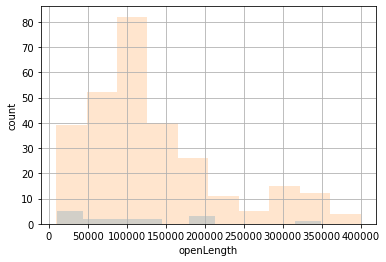

In [26]:
ax = O.openLength.hist(color="C1", alpha=0.2)
ax = C.openLength.hist(color="C0", alpha=0.2)

ax.set_xlabel("openLength")
ax.set_ylabel("count")

### bedCount

In [27]:
bedCount = train[["bedCount", "OC"]]
O = bedCount[bedCount.OC == "open"]
C = bedCount[bedCount.OC == " close"]

Text(0, 0.5, 'density')

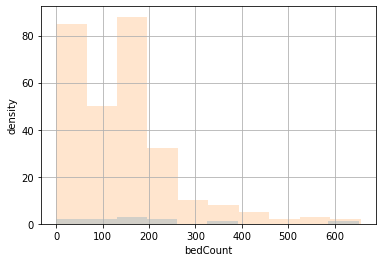

In [28]:
ax = O.bedCount.hist(color="C1", alpha=0.2)
ax = C.bedCount.hist(color="C0", alpha=0.2)

ax.set_xlabel("bedCount")
ax.set_ylabel("density")

## 2016 ~ 2017 

In [218]:
def makingplots(v1, v2):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

    for OCvalue, color in ("open", "C1"), (" close", "C0"):
        subset_df = train[train.OC == OCvalue]
        ax[0].scatter(subset_df[v2], subset_df[v1], color="none", edgecolor=color)
    ax[0].set_xlabel("2016 %s" %(v1[:-1]))
    ax[0].set_ylabel("2017 %s" %(v2[:-1]))
    ax[0].legend(["OPEN", "CLOSE"])

    # density=True -> y축에서 각 구간의 개수가 아니라 각 구간의 빈도가 표시됨 
    ax[1].hist(O, color="C1", alpha=0.2, label="OPEN", density=True)
    ax[1].hist(C, color="C0", alpha=0.2, label="CLOSE", density=True) # False로 하면 close 표본 자체가 너무 적기 때문에 True로 해줌
    ax[1].set_xlabel("Differences (2017 %s - 2016 %s)" %(v1[:-1], v2[:-1]))
    ax[1].set_ylabel("Density")

    ax[0].set_title("Scatter : 2016 %s - 2017 %s" %(v1[:-1], v2[:-1]))
    ax[1].set_title("Histogram : Differences (2017 %s - 2016 %s)" %(v1[:-1], v2[:-1]))

    plt.legend()
    plt.show()

## Revenue : 매출액

In [219]:
revenue = train[["revenue1", "revenue2", "OC"]]
revenue["diff"] = revenue["revenue1"] - revenue["revenue2"]   # 2017 값 - 2016 값

In [220]:
O = revenue[revenue.OC == "open"]["diff"]
C = revenue[revenue.OC == " close"]["diff"]

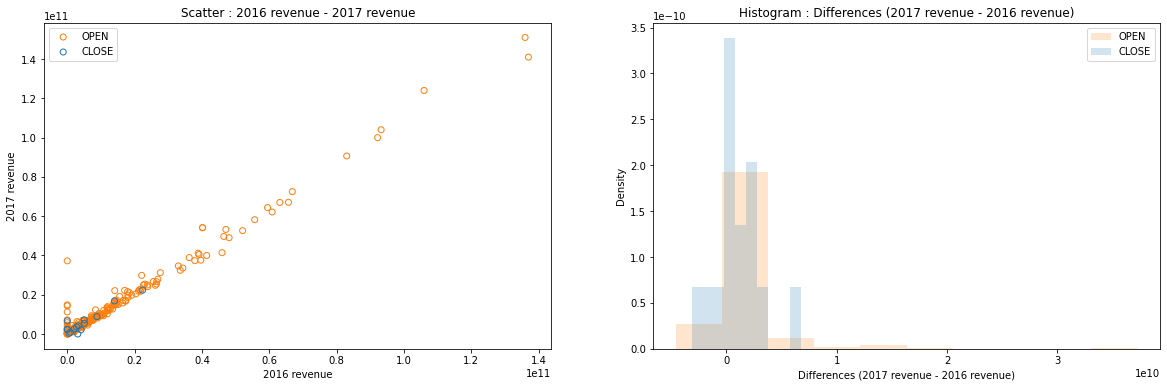

In [221]:
makingplots("revenue1", "revenue2")

## salescost : 매출원가

In [222]:
salescost = train[["salescost1", "salescost2", "OC"]]
salescost["diff"] = salescost["salescost1"] - salescost["salescost2"]   # 2017 값 - 2016 값

In [223]:
O = salescost[salescost.OC == "open"]["diff"]
C = salescost[salescost.OC == " close"]["diff"]

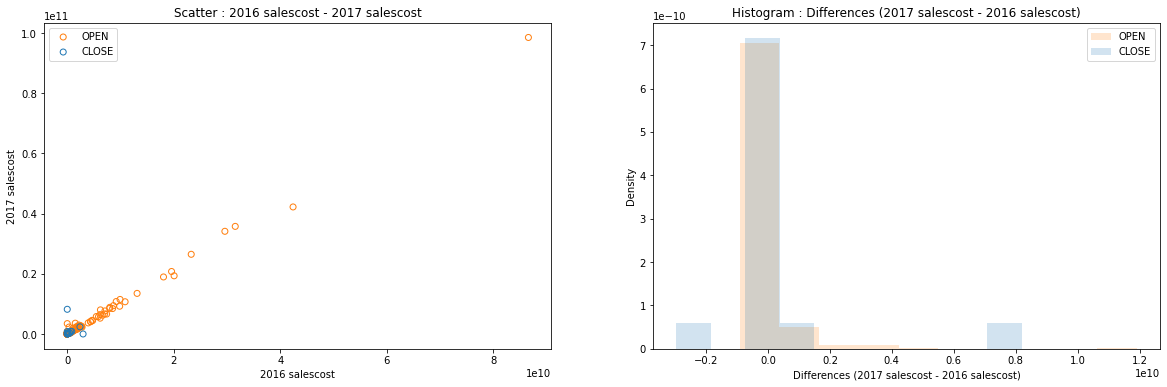

In [224]:
makingplots("salescost1", "salescost2")

## sga : 판매비와 관리비

In [225]:
sga = train[["sga1", "sga2", "OC"]]
sga["diff"] = sga["sga1"] - sga["sga2"]   # 2017 값 - 2016 값

In [226]:
O = sga[sga.OC == "open"]["diff"]
C = sga[sga.OC == " close"]["diff"]

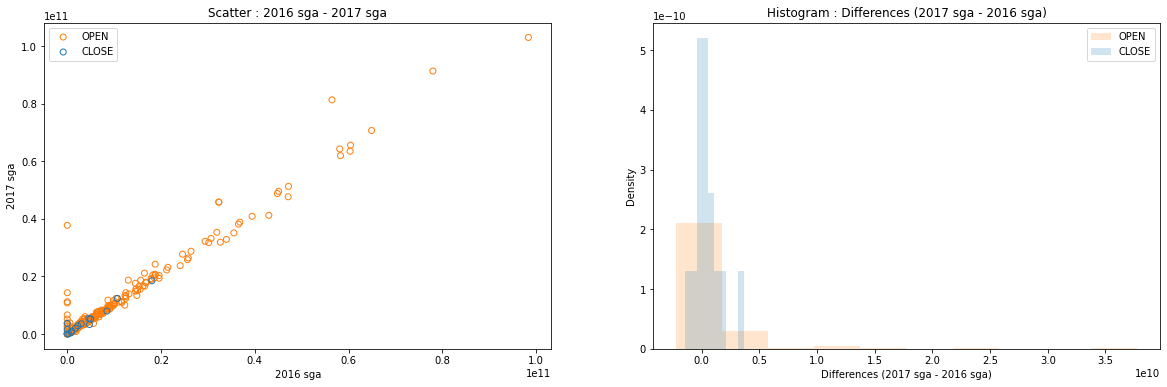

In [227]:
makingplots("sga1", "sga2")

## salary : 급여

In [228]:
salary = train[["salary1", "salary2", "OC"]]
salary["diff"] = salary["salary1"] - salary["salary2"]   # 2017 값 - 2016 값

In [229]:
O = salary[salary.OC == "open"]["diff"]
C = salary[salary.OC == " close"]["diff"]

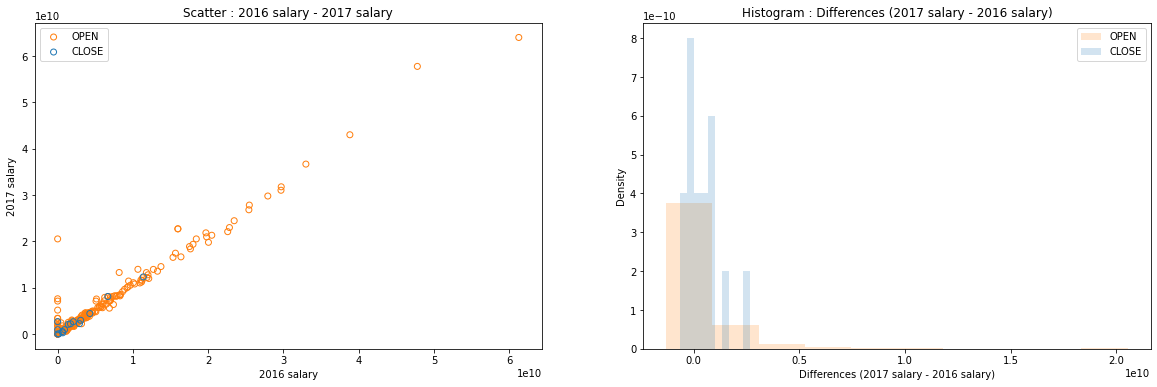

In [230]:
makingplots("salary1", "salary2")

## noi : 영업 외 수익

In [231]:
noi = train[["noi1", "noi2", "OC"]]
noi["diff"] = noi["noi1"] - noi["noi2"]   # 2017 값 - 2016 값

In [232]:
O = noi[noi.OC == "open"]["diff"]
C = noi[noi.OC == " close"]["diff"]

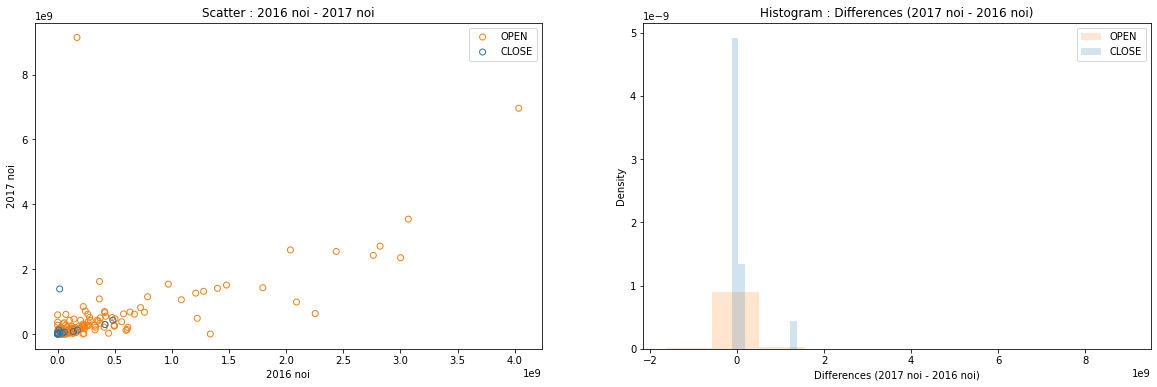

In [233]:
makingplots("noi1", "noi2")

## noe : 영업 외 비용 

In [234]:
noe = train[["noe1", "noe2", "OC"]]
noe["diff"] = noe["noe1"] - noe["noe2"]   # 2017 값 - 2016 값

In [235]:
O = noe[noe.OC == "open"]["diff"]
C = noe[noe.OC == " close"]["diff"]

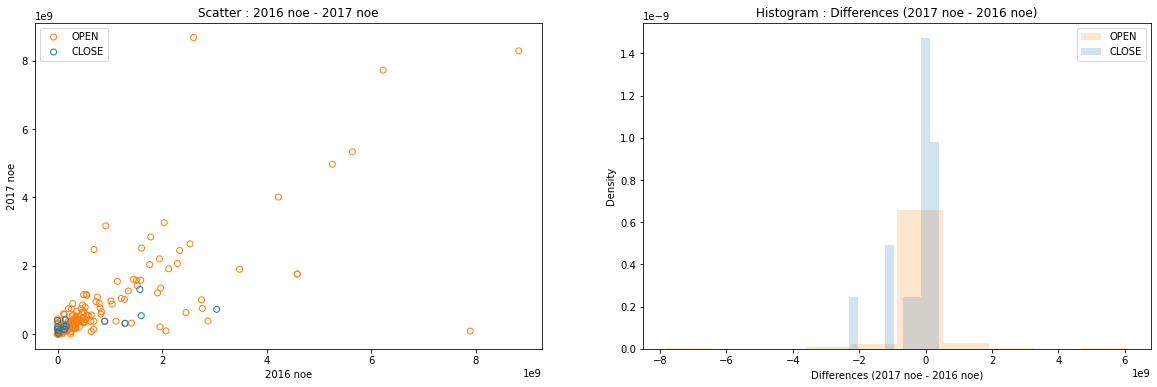

In [236]:
makingplots("noe1", "noe2")

## interest : 이자 비용 

In [237]:
interest = train[["interest1", "interest2", "OC"]]
interest["diff"] = interest["interest1"] - interest["interest2"]   # 2017 값 - 2016 값

In [238]:
O = interest[interest.OC == "open"]["diff"]
C = interest[interest.OC == " close"]["diff"]

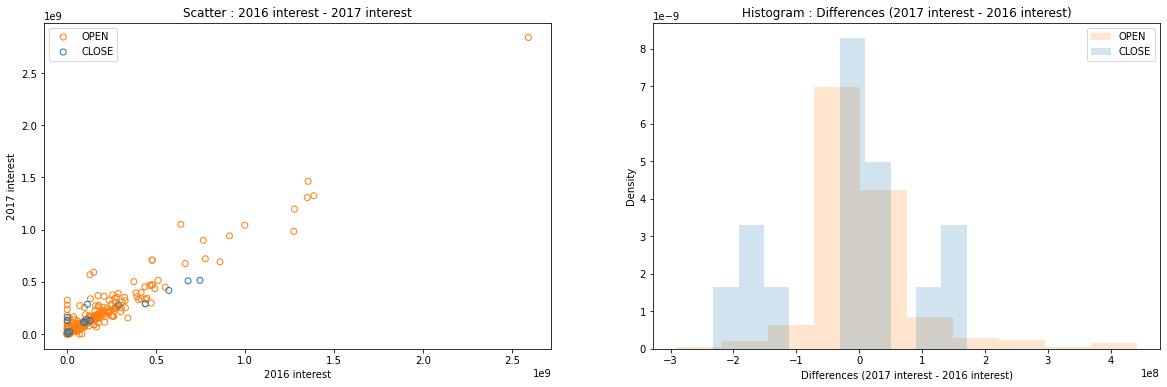

In [239]:
makingplots("interest1", "interest2")

## ctax :  법인세 비용 

In [240]:
ctax = train[["ctax1", "ctax2", "OC"]]
ctax["diff"] = ctax["ctax1"] - ctax["ctax2"]   # 2017 값 - 2016 값

In [241]:
O = ctax[ctax.OC == "open"]["diff"]
C = ctax[ctax.OC == " close"]["diff"]

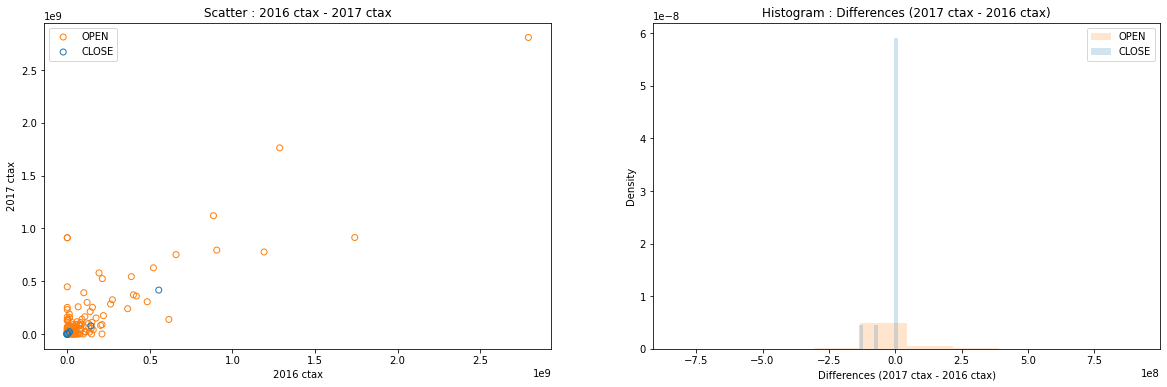

In [242]:
makingplots("ctax1", "ctax2")

## profit : 당기 순이익

In [243]:
profit = train[["profit1", "profit2", "OC"]]
profit["diff"] = profit["profit1"] - profit["profit2"]   # 2017 값 - 2016 값

In [244]:
O = profit[profit.OC == "open"]["diff"]
C = profit[profit.OC == " close"]["diff"]

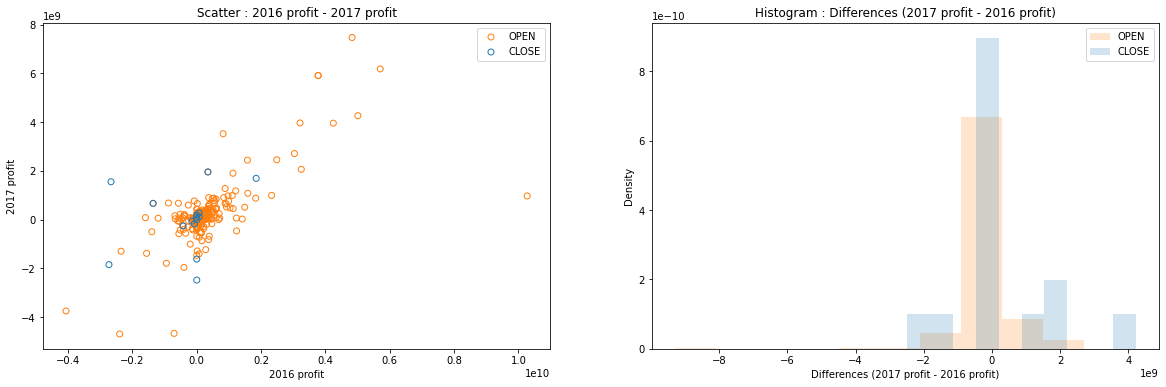

In [245]:
makingplots("profit1", "profit2")

## liquidAsset : 유동자산

In [246]:
liquidAsset = train[["liquidAsset1", "liquidAsset2", "OC"]]
liquidAsset["diff"] = liquidAsset["liquidAsset1"] - liquidAsset["liquidAsset2"]   # 2017 값 - 2016 값

In [247]:
O = liquidAsset[liquidAsset.OC == "open"]["diff"]
C = liquidAsset[liquidAsset.OC == " close"]["diff"]

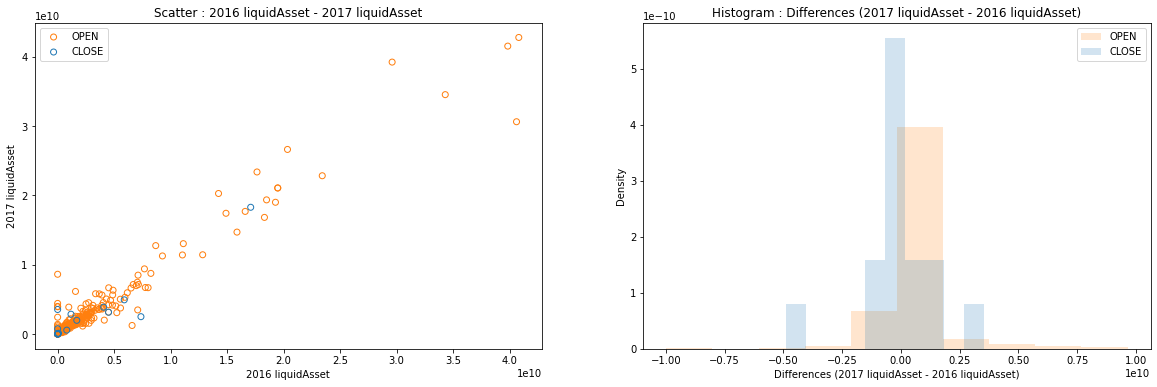

In [248]:
makingplots("liquidAsset1", "liquidAsset2")

## quickAsset : 당좌자산

In [249]:
quickAsset = train[["quickAsset1", "quickAsset2", "OC"]]
quickAsset["diff"] = quickAsset["quickAsset1"] - quickAsset["quickAsset2"]   # 2017 값 - 2016 값

In [250]:
O = quickAsset[quickAsset.OC == "open"]["diff"]
C = quickAsset[quickAsset.OC == " close"]["diff"]

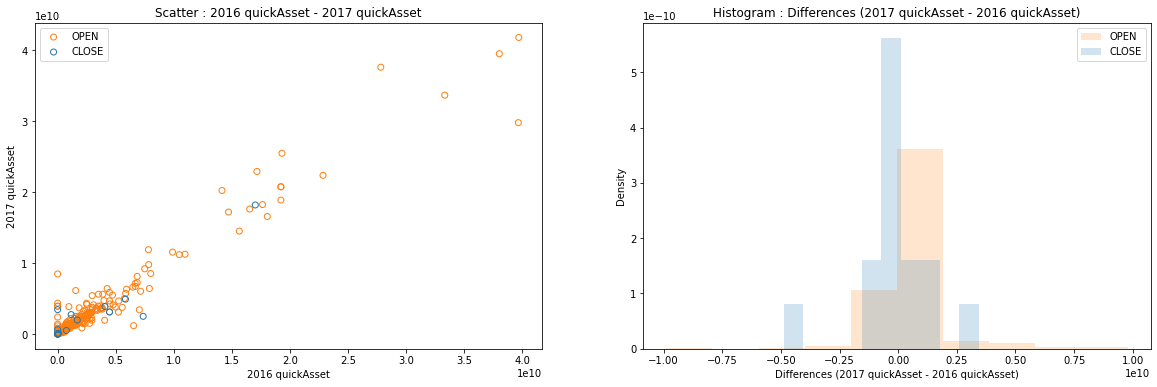

In [251]:
makingplots("quickAsset1", "quickAsset2")

## receivableS : 미수금 (단기)

In [254]:
receivableS = train[["receivableS1", "receivableS2", "OC"]]
receivableS["diff"] = receivableS["receivableS1"] - receivableS["receivableS2"]   # 2017 값 - 2016 값

In [255]:
O = receivableS[receivableS.OC == "open"]["diff"]
C = receivableS[receivableS.OC == " close"]["diff"]

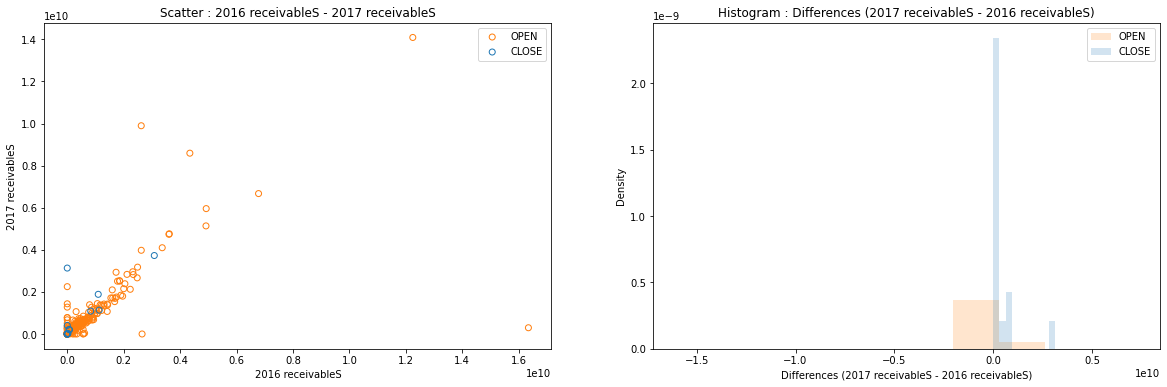

In [256]:
makingplots("receivableS1", "receivableS2")

## inventoryAsset : 재고자산

In [259]:
inventoryAsset = train[["inventoryAsset1", "inventoryAsset2", "OC"]]
inventoryAsset["diff"] = inventoryAsset["inventoryAsset1"] - inventoryAsset["inventoryAsset2"]   # 2017 값 - 2016 값

In [260]:
O = inventoryAsset[inventoryAsset.OC == "open"]["diff"]
C = inventoryAsset[inventoryAsset.OC == " close"]["diff"]

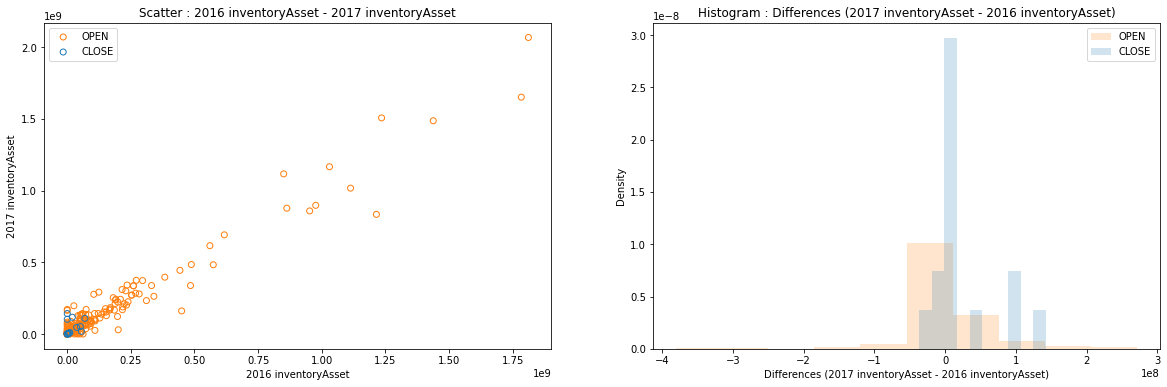

In [261]:
makingplots("inventoryAsset1", "inventoryAsset2")

## nonCAsset : 비유동자산 

In [262]:
nonCAsset = train[["nonCAsset1", "nonCAsset2", "OC"]]
nonCAsset["diff"] = nonCAsset["nonCAsset1"] - nonCAsset["nonCAsset2"]   # 2017 값 - 2016 값

In [263]:
O = nonCAsset[nonCAsset.OC == "open"]["diff"]
C = nonCAsset[nonCAsset.OC == " close"]["diff"]

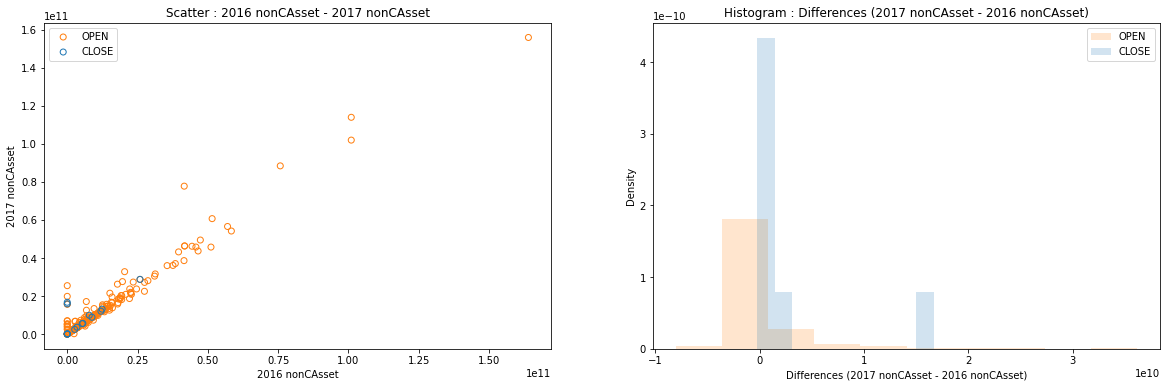

In [264]:
makingplots("nonCAsset1", "nonCAsset2")

## tanAsset : 유형자산

In [265]:
tanAsset = train[["tanAsset1", "tanAsset2", "OC"]]
tanAsset["diff"] = tanAsset["tanAsset1"] - tanAsset["tanAsset2"]   # 2017 값 - 2016 값

In [266]:
O = tanAsset[tanAsset.OC == "open"]["diff"]
C = tanAsset[tanAsset.OC == " close"]["diff"]

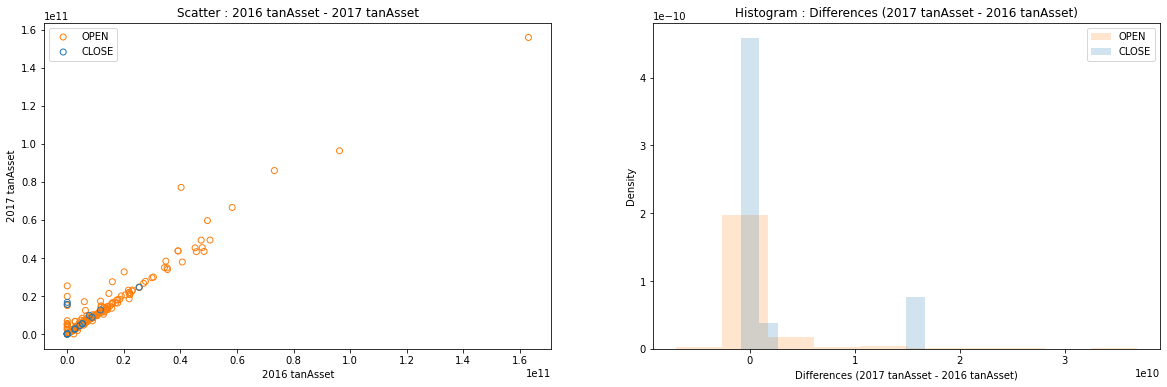

In [267]:
makingplots("tanAsset1", "tanAsset2")

## OnonCAsset : 기타 비유동자산

In [268]:
OnonCAsset = train[["OnonCAsset1", "OnonCAsset2", "OC"]]
OnonCAsset["diff"] = OnonCAsset["OnonCAsset1"] - OnonCAsset["OnonCAsset2"]   # 2017 값 - 2016 값

In [269]:
O = OnonCAsset[OnonCAsset.OC == "open"]["diff"]
C = OnonCAsset[OnonCAsset.OC == " close"]["diff"]

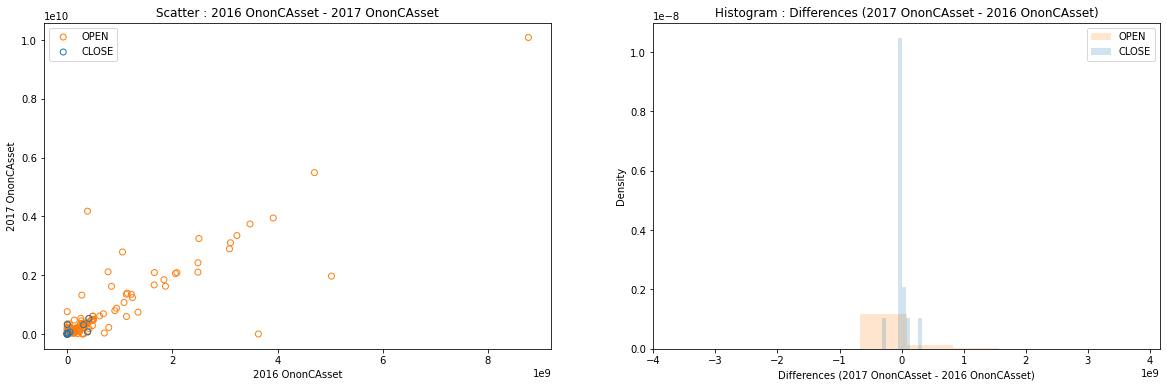

In [270]:
makingplots("OnonCAsset1", "OnonCAsset2")

## receivableL : 미수금 (장기)

In [271]:
receivableL = train[["receivableL1", "receivableL2", "OC"]]
receivableL["diff"] = receivableL["receivableL1"] - receivableL["receivableL2"]   # 2017 값 - 2016 값

In [272]:
O = receivableL[receivableL.OC == "open"]["diff"]
C = receivableL[receivableL.OC == " close"]["diff"]

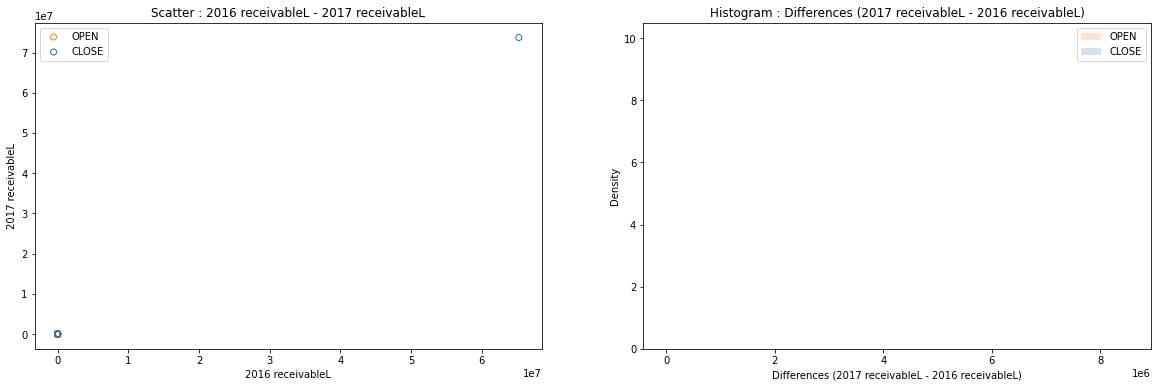

In [274]:
makingplots("receivableL1", "receivableL2")
# 결측값이 많은듯 ? ? 

## debt : 부채총계

In [275]:
debt = train[["debt1", "debt2", "OC"]]
debt["diff"] = debt["debt1"] - debt["debt2"]   # 2017 값 - 2016 값

In [276]:
O = debt[debt.OC == "open"]["diff"]
C = debt[debt.OC == " close"]["diff"]

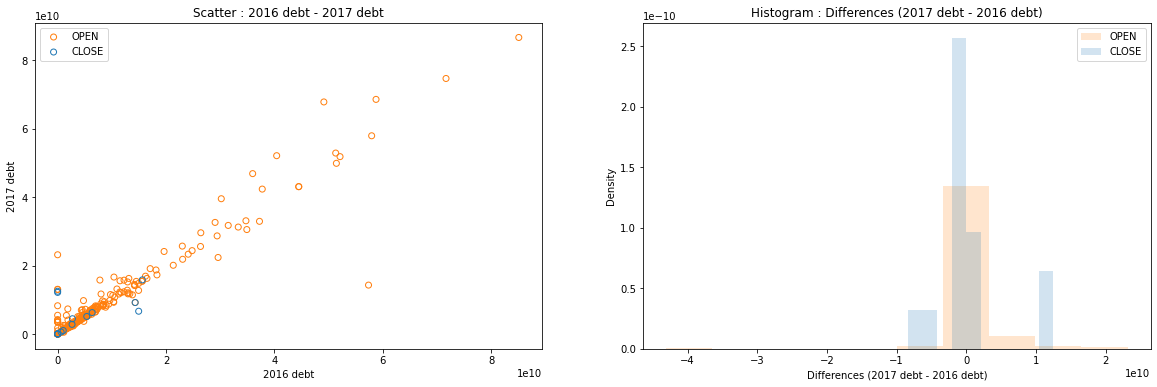

In [277]:
makingplots("debt1", "debt2")

## liquidLiabilities : 유동부채

In [279]:
liquidLiabilities = train[["liquidLiabilities1", "liquidLiabilities2", "OC"]]
liquidLiabilities["diff"] = liquidLiabilities["liquidLiabilities1"] - liquidLiabilities["liquidLiabilities2"]   # 2017 값 - 2016 값

In [280]:
O = liquidLiabilities[liquidLiabilities.OC == "open"]["diff"]
C = liquidLiabilities[liquidLiabilities.OC == " close"]["diff"]

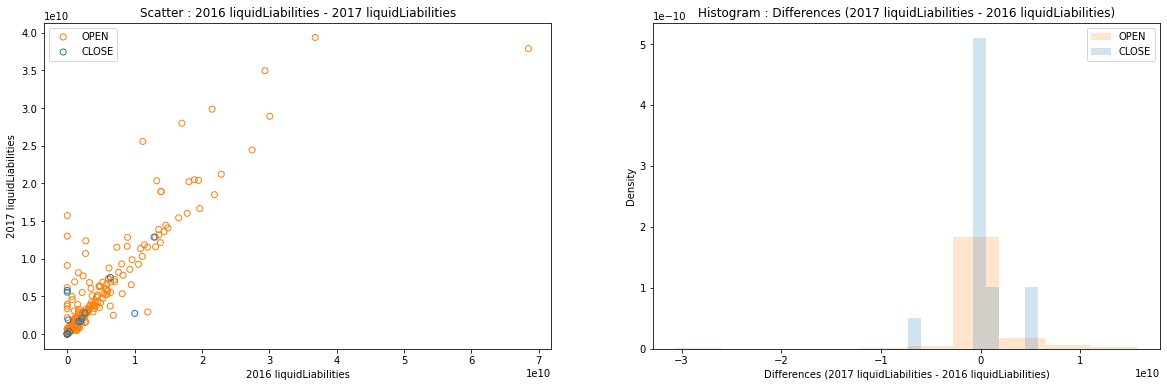

In [281]:
makingplots("liquidLiabilities1", "liquidLiabilities2")

## shortLoan : 단기차입금

In [282]:
shortLoan = train[["shortLoan1", "shortLoan2", "OC"]]
shortLoan["diff"] = shortLoan["shortLoan1"] - shortLoan["shortLoan2"]   # 2017 값 - 2016 값

In [283]:
O = shortLoan[shortLoan.OC == "open"]["diff"]
C = shortLoan[shortLoan.OC == " close"]["diff"]

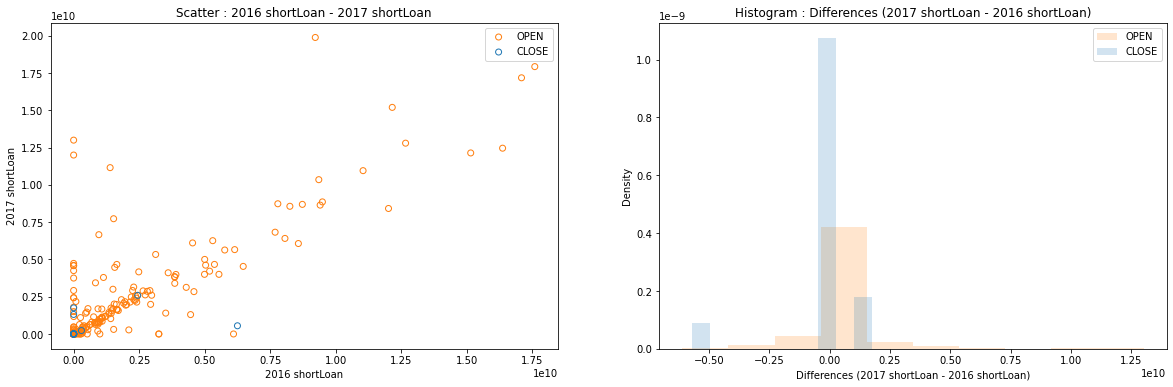

In [284]:
makingplots("shortLoan1", "shortLoan2")

## NCLiabilities : 비유동부채

In [287]:
NCLiabilities = train[["NCLiabilities1", "NCLiabilities2", "OC"]]
NCLiabilities["diff"] = NCLiabilities["NCLiabilities1"] - NCLiabilities["NCLiabilities2"]   # 2017 값 - 2016 값

In [288]:
O = NCLiabilities[NCLiabilities.OC == "open"]["diff"]
C = NCLiabilities[NCLiabilities.OC == " close"]["diff"]

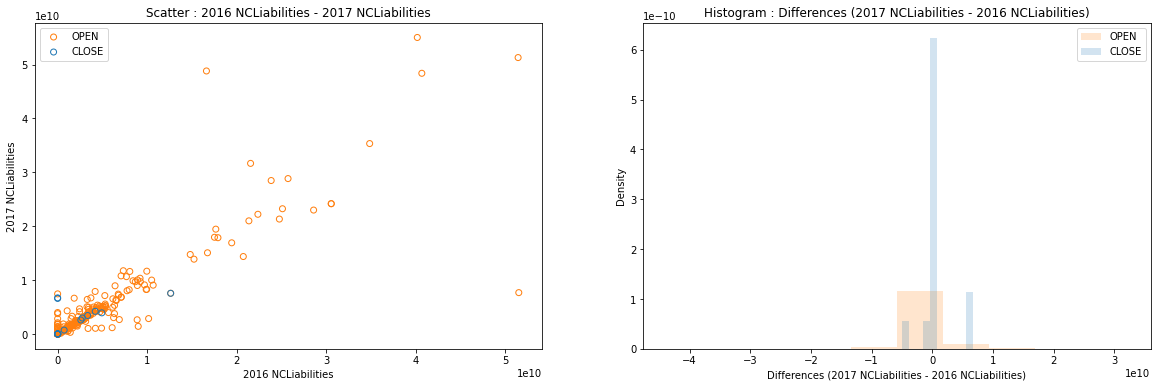

In [289]:
makingplots("NCLiabilities1", "NCLiabilities2")

## longLoan : 장기차입금

In [290]:
longLoan = train[["longLoan1", "longLoan2", "OC"]]
longLoan["diff"] = longLoan["longLoan1"] - longLoan["longLoan2"]   # 2017 값 - 2016 값

In [291]:
O = longLoan[longLoan.OC == "open"]["diff"]
C = longLoan[longLoan.OC == " close"]["diff"]

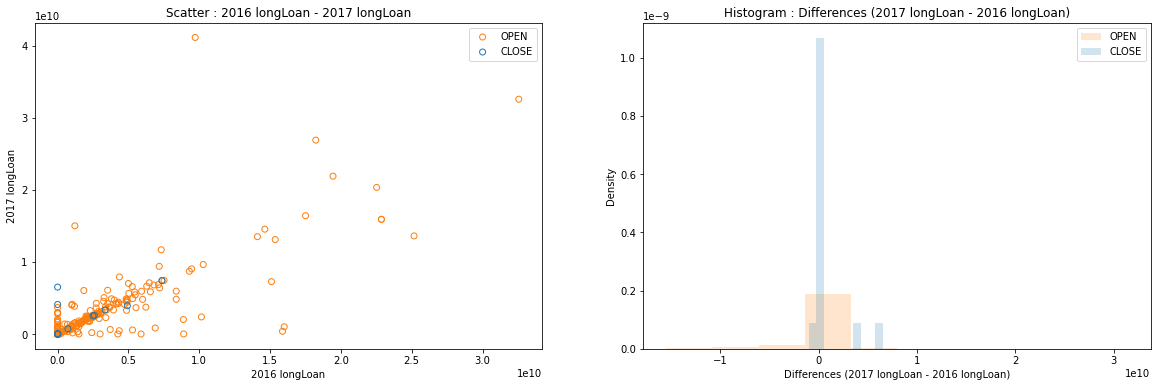

In [292]:
makingplots("longLoan1", "longLoan2")

## surplus : 이익잉여금

In [293]:
surplus = train[["surplus1", "surplus2", "OC"]]
surplus["diff"] = surplus["surplus1"] - surplus["surplus2"]   # 2017 값 - 2016 값

In [294]:
O = surplus[surplus.OC == "open"]["diff"]
C = surplus[surplus.OC == " close"]["diff"]

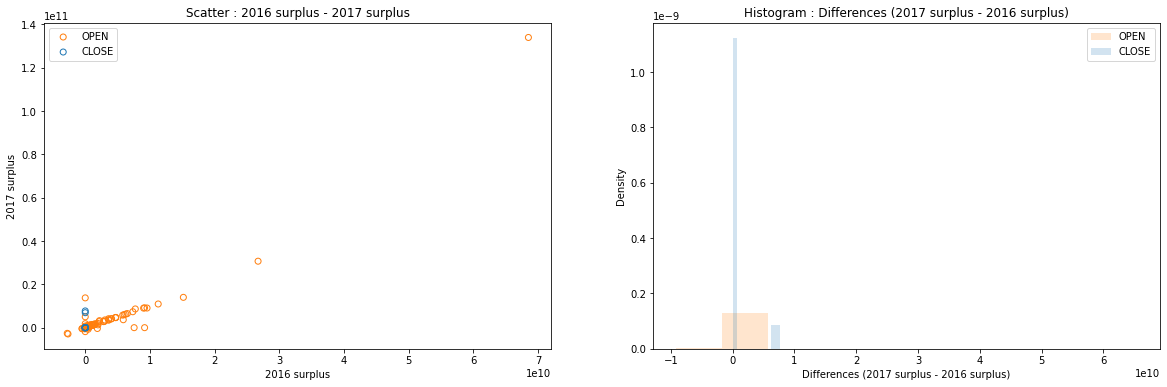

In [295]:
makingplots("surplus1", "surplus2")

## employee : 고용한 총 직원의 수

In [296]:
employee = train[["employee1", "employee2", "OC"]]
employee["diff"] = employee["employee1"] - employee["employee2"]   # 2017 값 - 2016 값

In [297]:
O = employee[employee.OC == "open"]["diff"]
C = employee[employee.OC == " close"]["diff"]

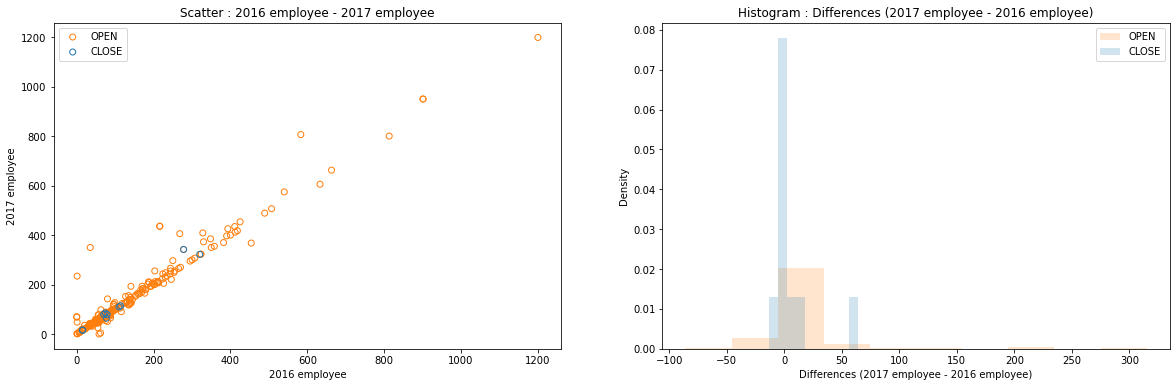

In [298]:
makingplots("employee1", "employee2")

### 수치형 변수들 특징  
- 산점도에서 폐업한 병원들은 왼쪽 아래, 즉 다 작은 편   
- 1,2 끼리 선형관계 이루는 변수 많음  
- 히스토그램에서 빈도차이가 많이 나는 변수들을 주의깊게 살펴보면 될듯  
- quickAsset과 liquidAsset은 분포가 같음 (?)

## 상관계수

In [70]:
# OC랑 상관계수 높은 변수들 도출해내고 싶은데 왜 OC는 숫자변수로 변환해도 상관계수 계산 안되는겨
# OC value를 open, close 가 아닌 1, 0 으로
train_n = train.replace({"OC":"open"}, 1)
train_n = train.replace({"OC":" close"}, 0)

In [71]:
corr = train_n.corr()

In [66]:
v2017 = train_n[['openDate', 'bedCount', 'revenue1', 'salescost1','sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1','nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1', 'employee1', "OC"]]
v2016 = train_n[['revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2', 'employee2', "OC"]]

In [67]:
corr2016 = v2016.corr()
corr2017 = v2017.corr()

## 2016 변수 상관관계: 2

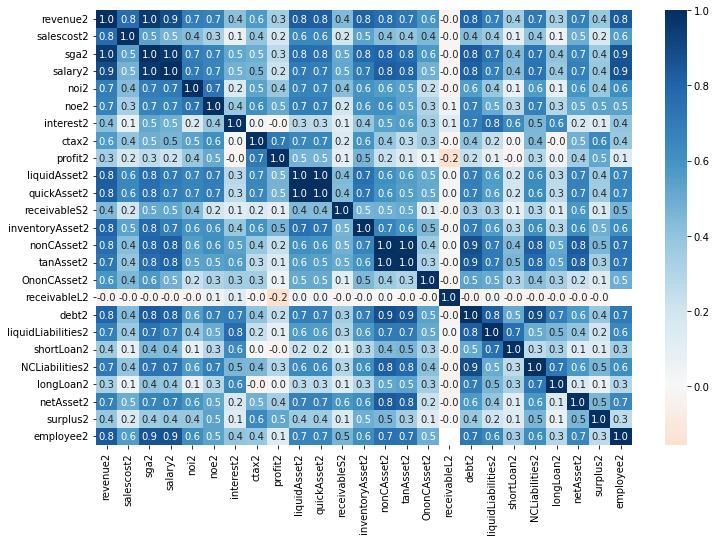

In [68]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr2016, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

**revenue2 - sga2 : 1.0   
revenue2 - salary2 : 0.9    
sga2 - salary2 : 1.0  
sga2 - employee2 : 0.9  
salary2 - employee2 : 0.9   
nonCAsset2 - tanAsset2 : 1.0  
nonCAsset2 - debt2 : 0.9  
tanAsset2 - debt2 : 0.9  
debt2 - NCLiabilities : 0.9** 

## 2017 변수 상관관계 : 1 

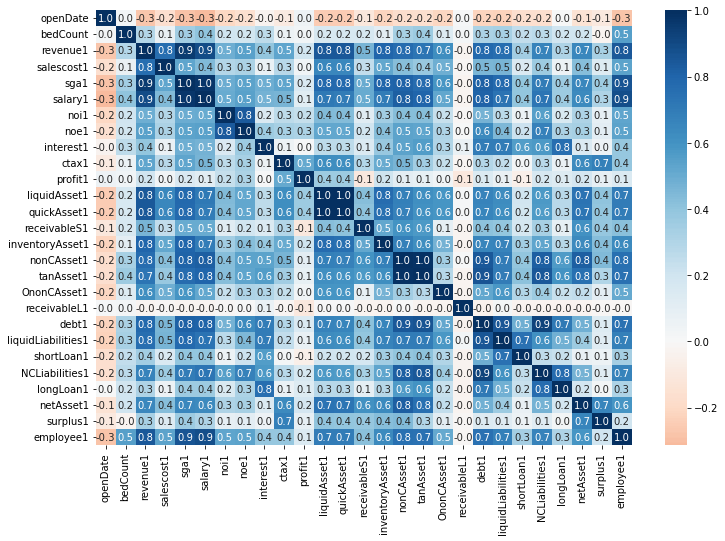

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr2017, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

**revenue1 - sga1 : 0.9  
revenue1 - salary1 : 0.9  
sga1 - salary1 : 1.0  
sga1 - employee1 : 0.9  
employee1 - salary1 : 0.9**   
liquidAsset1 - quickAsset1 : 1.0  
**nonCAsset1 - tanAsset1 : 1.0  
nonCAsset1 - debt1 : 0.9  
tanAsset1 - debt1 : 0.9  
debt1 - NCLiabilities : 0.9**  